In [1]:
%matplotlib inline
#графики в  Scalable Vector Graphics выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import matplotlib.mlab as mlab
 
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6, 4

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('yob1880.txt', names = ["Name", "Sex", "Number"])
data['Year'] = 1880
data.head()

,Name,Sex,Number,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [3]:
for i in range(1881, 2011):
    filename = 'yob'+str(i)+'.txt'
    data2 = pd.read_csv(filename, names = ["Name", "Sex", "Number"])
    data2['Year'] = i
    data = data.append(data2, ignore_index=True)

In [4]:
data.head()

,Name,Sex,Number,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
data.tail()

,Name,Sex,Number,Year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [6]:
babies_by_sex = data.groupby(["Year", "Sex"])["Number"].aggregate("sum").reset_index()
babies_by_sex.head()

,Year,Sex,Number
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851


In [7]:
babies_by_sex = babies_by_sex.pivot("Year", "Sex")
babies_by_sex.head()

Number        
Sex        F       M
Year                
1880   90993  110493
1881   91955  100748
1882  107851  113687
1883  112322  104632
1884  129021  114445

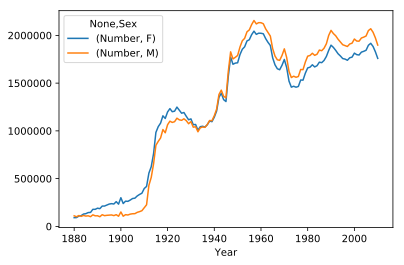

In [8]:
babies_by_sex.plot()

## Найдите самые популярные имена за всю историю

In [9]:
babies_by_name = data.groupby(["Name"])["Number"].aggregate("sum").reset_index().sort_values(by=['Number'], ascending=False)
babies_by_name.head(10)

,Name,Number
34995,James,5072771
38950,John,5061897
68084,Robert,4788050
57277,Michael,4265373
55384,Mary,4119074
85076,William,4002392
19333,David,3538748
67665,Richard,2552269
39629,Joseph,2529809
14390,Charles,2347703


## Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

In [10]:
years_in_one_part = int(len(range(1880, 2011))/10)
first_years = [1880]
for i in range(9):
    first_years.append(first_years[-1]+years_in_one_part)
first_years

[1880, 1893, 1906, 1919, 1932, 1945, 1958, 1971, 1984, 1997]

In [11]:
data_1997 = data[data['Year'].isin(range(1997, 2011))]
data_1997_p = data_1997.groupby(["Name"])["Number"].aggregate("sum").reset_index().sort_values(by=['Number'], ascending=False)
names_df = data_1997_p.head(1)
print(data_1997_p.head(1))

        Name  Number
22933  Jacob  401381


In [12]:
for i in range (9):
    range_years = first_years[i], first_years[i+1]
    data_p = data[data['Year'].isin(range(range_years[0], range_years[1]))]
    data_p = data_p.groupby(["Name"])["Number"].aggregate("sum").reset_index().sort_values(by=['Number'], ascending=False)
    names_new = data_p.head(1)
    names_df = names_df.append(names_new, ignore_index=True)
names_df

,Name,Number
0,Jacob,401381
1,Mary,129114
2,Mary,184566
3,Mary,486142
4,Mary,895139
5,Robert,813738
6,James,1120580
7,Michael,1099027
8,Michael,902415
9,Michael,748543


In [13]:
names = ['Mary', 'Robert', 'James', 'Michael', 'Jacob']

In [14]:
babies_by_name = data.groupby(["Year", "Name"])["Number"].aggregate("sum").reset_index()

In [15]:
babies_by_name = babies_by_name[babies_by_name['Name'].isin(names)]
babies_by_name = babies_by_name.pivot("Year", "Name")
babies_by_name.head()

Number                           
Name  Jacob James  Mary Michael Robert
Year                                  
1880    404  5949  7092     354   2427
1881    381  5466  6948     298   2149
1882    390  5910  8179     321   2512
1883    356  5249  8044     307   2345
1884    381  5726  9253     373   2476

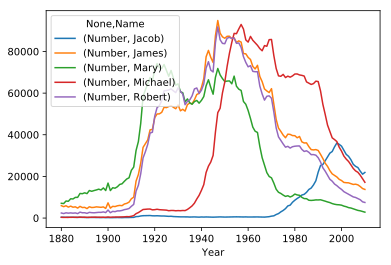

In [16]:
babies_by_name.plot()

## Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

In [17]:
babies_count = data.groupby(["Year"])["Number"].aggregate("sum").reset_index()
babies_count.head()

,Year,Number
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466


In [18]:
babies_count_half = babies_count["Number"]/2
babies_count_half.head()

0    100743.0
1     96351.5
2    110769.0
3    108477.0
4    121733.0
Name: Number, dtype: float64

In [19]:
babies_count_list = []

for j in range(131):
    year_1 = babies_count['Year'][j]
    babies_1 = data[data['Year']==year_1]
    babies_1 = babies_1.groupby(["Name"])["Number"].aggregate("sum").reset_index().sort_values(by=['Number'], ascending=False)
    count = 0
    all_names_count = babies_1.shape[0]
    indx = range(all_names_count)
    babies_1['Index'] = indx
    babies_1 = pd.pivot_table(babies_1, index = 'Index', values="Number")
    i = 0
    while count < babies_count_half[j]:
        count += babies_1['Number'][i]
        i += 1
    babies_count_list.append(i)
babies_count_list

[45,
 47,
 49,
 51,
 53,
 54,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 62,
 64,
 65,
 66,
 66,
 68,
 68,
 70,
 70,
 71,
 71,
 73,
 73,
 72,
 74,
 74,
 75,
 76,
 76,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 77,
 77,
 77,
 76,
 77,
 76,
 77,
 77,
 76,
 75,
 74,
 74,
 74,
 75,
 74,
 72,
 72,
 72,
 71,
 70,
 68,
 65,
 63,
 61,
 61,
 62,
 60,
 60,
 61,
 61,
 61,
 61,
 62,
 64,
 65,
 67,
 69,
 72,
 77,
 79,
 82,
 84,
 85,
 85,
 85,
 84,
 82,
 83,
 84,
 88,
 91,
 95,
 97,
 100,
 101,
 102,
 100,
 100,
 100,
 99,
 96,
 94,
 93,
 89,
 91,
 93,
 95,
 98,
 103,
 110,
 117,
 125,
 134,
 142,
 150,
 157,
 165,
 174,
 182,
 190,
 202,
 213,
 220,
 228,
 238,
 251,
 264,
 277,
 290,
 301,
 307]

In [20]:
babies_count['Count of names covering 50%'] = babies_count_list
babies_count.head()

,Year,Number,Count of names covering 50%
0,1880,201486,45
1,1881,192703,47
2,1882,221538,49
3,1883,216954,51
4,1884,243466,53


In [21]:
babies_count = babies_count[['Year', 'Count of names covering 50%']]
babies_count.set_index('Year')
babies_count.head()

,Year,Count of names covering 50%
0,1880,45
1,1881,47
2,1882,49
3,1883,51
4,1884,53


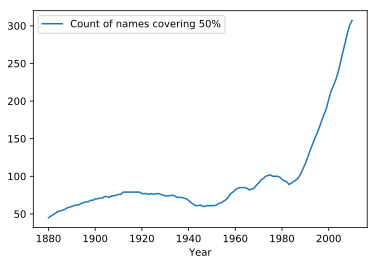

In [22]:
babies_count.plot.line(x='Year', y='Count of names covering 50%')

## Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

In [23]:
data['First']=data['Name'].str[0]
data['Last']=data['Name'].str[-1]
data.head()

,Name,Sex,Number,Year,First,Last
0,Mary,F,7065,1880,M,y
1,Anna,F,2604,1880,A,a
2,Emma,F,2003,1880,E,a
3,Elizabeth,F,1939,1880,E,h
4,Minnie,F,1746,1880,M,e


In [24]:
chosen_years = [1880, 1945, 1989, 2003]

In [25]:
def plot_letter_dist(year, position='first'):
    year_1 = year
    babies_by_letter_y = data[data['Year']==year_1]
    if position=='first':
        babies_by_letter_y = babies_by_letter_y.groupby(["First"])["Number"].aggregate("count").reset_index().sort_values(by=['Number'], ascending=False)
        namestr = 'Distribution of first letter in '+ str(year)
        babies_by_letter_y.plot.bar(x='First', title=namestr)
    else:
        babies_by_letter_y = babies_by_letter_y.groupby(["Last"])["Number"].aggregate("count").reset_index().sort_values(by=['Number'], ascending=False)
        namestr = 'Distribution of last letter in '+ str(year)
        babies_by_letter_y.plot.bar(x='Last', title=namestr)

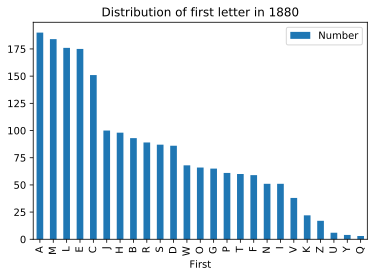

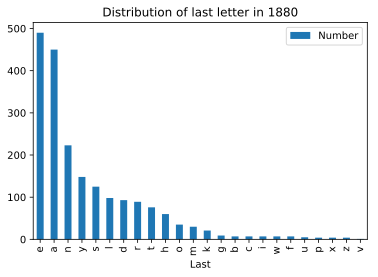

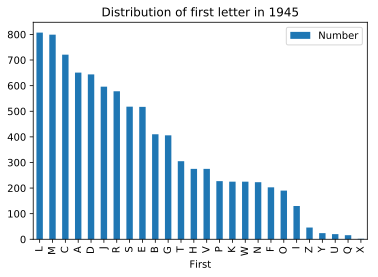

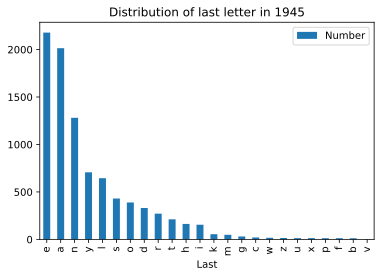

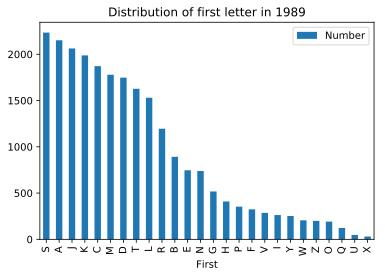

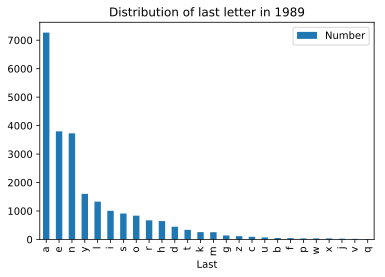

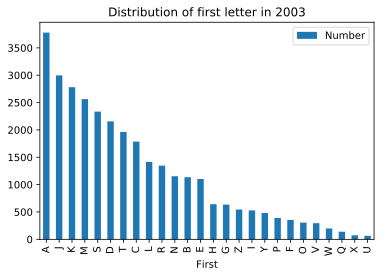

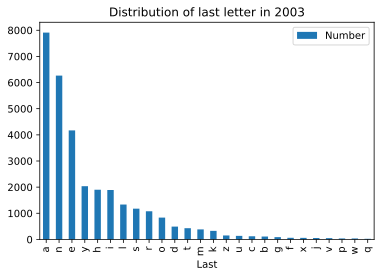

In [26]:
for y in chosen_years:
    plot_letter_dist(y, position='first')
    plot_letter_dist(y, position='last')

## Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

In [27]:
celebs = ['Frank', 'Marilyn', 'Britney', 'Doris']
babies_by_celeb_name = data.groupby(["Year", "Name"])["Number"].aggregate("sum").reset_index()
babies_by_celeb_name = babies_by_celeb_name[babies_by_celeb_name['Name'].isin(celebs)]
babies_by_celeb_name = babies_by_celeb_name.pivot("Year", "Name")
babies_by_celeb_name = babies_by_celeb_name.fillna(0)
babies_by_celeb_name.head()

Number                      
Name Britney Doris   Frank Marilyn
Year                              
1880     0.0   9.0  3255.0     0.0
1881     0.0  10.0  2843.0     0.0
1882     0.0  16.0  3187.0     0.0
1883     0.0  21.0  3003.0     0.0
1884     0.0  23.0  3239.0     0.0

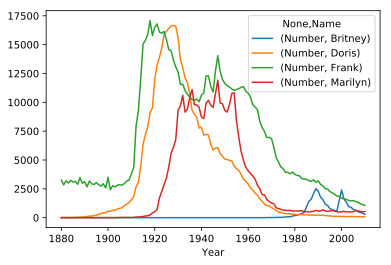

In [28]:
babies_by_celeb_name.plot()